## G2M insight for Cab Investment firm

Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

The followings data sets contain information on 2 cab companies. Below are the list of datasets which are provided for the analysis:

* Cab_Data.csv – this file includes details of transaction for 2 cab companies
* Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details
* Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode
* City.csv – this file contains list of US cities, their population and number of cab users

Time period of data is from 31/01/2016 to 31/12/2018.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the datasets
df_cab = pd.read_csv('data_sets/Cab_Data.csv')
df_city = pd.read_csv('data_sets/City.csv')
df_c_id = pd.read_csv('data_sets/Customer_ID.csv')
df_t_id = pd.read_csv('data_sets/Transaction_ID.csv')

In [3]:
# Show df_cab structure
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
# Check if there is lost values and the dimensions of the data set
df_cab.info()
df_c_id.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [5]:
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [7]:
df_c_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
df_c_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
df_t_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
df_t_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


As can be seen, there are 4 sets of data. They are described a little better in the following:
* **df_cab(source file "Cab_Data.csv ")**: is the main dataset containing the information about trips. It has 359392 entries(none null). It consists of 7 columns:
    + Transaction ID:      int64
    + Date of Travel:      int64
    + Company:            object
    + City:               object
    + KM Travelled:      float64
    + Price Charged:     float64
    + Cost of Trip:      float64
    
    
* **df_city(source file "City.csv ")**: this dataframe has the information about the cities where the trips take place. It has 20 entries(none null). It consists of 3 columns:
    + City: object
    + Population: object
    + Users: object
    
    
* **df_c_id(source file "Customer_ID.csv ")**: this dataframe contains information on each of the two companies' customers. It has 49171  entries(none null). It consists of 4 columns:
    + Customer ID: int64	
    + Gender: object
    + Age: int64	
    + Income (USD/Month): int64	
    
    
* **df_t_id(source file "Transaction_ID.csv ")**: this dataframe contains information on every single transaction that has been made. It has 440098 entries(none null). It consists of 3 columns:
    + Transaction ID: int64		
    + Customer ID: int64		
    + Payment_Mode: object 


The following graph shows the relationship between the attributes of the 4 dataframes.

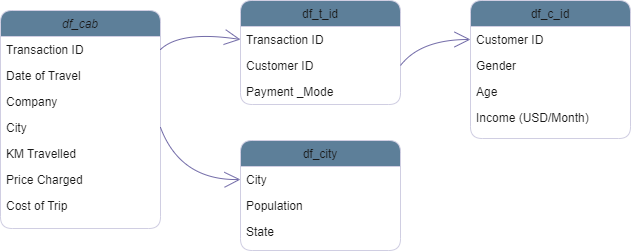

From the graph it can be seen that: 
* the table "df_t_id" contains information about the transactions in "df_cab". 
* the table "df_city" contains information about the cities where trips are made in "df_cab". 
* the table "df_c_id" has information about the customers making transactions in df_t_id. 
* the table "df_c_id" has information about the customers making transactions in "df_t_id".

Spaces will be replaced by underscores and all attribute names will be changed to lower case to make it easier to work with.

In [11]:
df_cab.columns = df_cab.columns.str.replace(' ', '_').str.lower()
df_city.columns = df_city.columns.str.replace(' ', '_').str.lower()
df_c_id.columns = df_c_id.columns.str.replace(' ', '_').str.lower()
df_t_id.columns = df_t_id.columns.str.replace(' ', '_').str.lower()

Let's analyse the variables of each of the dataframes that should be modified.

* In df_cab, the variable "date_of_travel" is in integer format. It will be transformed to date format:

In [12]:
df_cab['date_of_travel'] = pd.to_datetime(df_cab['date_of_travel'],unit = 'D',origin = '1899-12-30')
df_cab['date_of_travel'].head()

0   2016-01-08
1   2016-01-06
2   2016-01-02
3   2016-01-07
4   2016-01-03
Name: date_of_travel, dtype: datetime64[ns]

* In df_city, the variables "population" and "users" are to be transformed to integer type:

In [13]:
df_city["population"] = df_city["population"].apply(lambda x: x.replace(',', ''))
df_city["population"].apply(lambda x: int(x))
df_city["users"] = df_city["users"].apply(lambda x: x.replace(',', ''))
df_city["users"].apply(lambda x: int(x))

df_city.head()


,city,population,users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


Some variables will be created that may be useful in determining whether it is viable to make an investment.

**trip profit**: the difference between the price paid and the cost of the trip.

In [14]:
df_cab["trip_profit"] = df_cab["price_charged"]-df_cab["cost_of_trip"]

**profitkm**: profit per kiometre

In [15]:
df_cab["profit_km"] = df_cab["trip_profit"]/df_cab["km_travelled"]

The 4 data frames will be joined together to create a master data frame to make it easier to work with.

In [16]:
df_merge_1 = df_city.merge(df_cab, on='city', how='outer')
print(df_merge_1.shape)
df_merge_2 = df_t_id.merge(df_c_id, on='customer_id', how='outer')
print(df_merge_2.shape)
df_master = df_merge_1.merge(df_merge_2, on='transaction_id', how='outer')
print(df_master.shape)
df_master = df_master.drop_duplicates(keep="first")
df_master = df_master.dropna(axis=1, how='all')
print(df_master.shape)
df_master.head()

(359393, 11)
(440098, 6)
(440099, 16)
(440099, 16)


,city,population,users,transaction_id,date_of_travel,company,km_travelled,price_charged,cost_of_trip,trip_profit,profit_km,customer_id,payment_mode,gender,age,income_(usd/month)
0,NEW YORK NY,8405837,302149,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,44.765,2.507843,2416.0,Cash,Male,28.0,21399.0
1,NEW YORK NY,8405837,302149,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,151.680,5.995257,2060.0,Card,Male,18.0,8149.0
2,NEW YORK NY,8405837,302149,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,50.362,3.085907,1451.0,Card,Male,35.0,23989.0
3,NEW YORK NY,8405837,302149,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188,50.422,4.056476,1609.0,Card,Male,30.0,23036.0
4,NEW YORK NY,8405837,302149,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460,84.110,2.831987,2927.0,Cash,Male,33.0,14520.0


In [17]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440099 entries, 0 to 440098
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                359393 non-null  object        
 1   population          359393 non-null  object        
 2   users               359393 non-null  object        
 3   transaction_id      440098 non-null  float64       
 4   date_of_travel      359392 non-null  datetime64[ns]
 5   company             359392 non-null  object        
 6   km_travelled        359392 non-null  float64       
 7   price_charged       359392 non-null  float64       
 8   cost_of_trip        359392 non-null  float64       
 9   trip_profit         359392 non-null  float64       
 10  profit_km           359392 non-null  float64       
 11  customer_id         440098 non-null  float64       
 12  payment_mode        440098 non-null  object        
 13  gender              440098 no

A more exhaustive analysis of the master dataframe will be carried out.

In [18]:
df_master.dropna(subset=['users'], inplace=True)
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359393 entries, 0 to 359392
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                359393 non-null  object        
 1   population          359393 non-null  object        
 2   users               359393 non-null  object        
 3   transaction_id      359392 non-null  float64       
 4   date_of_travel      359392 non-null  datetime64[ns]
 5   company             359392 non-null  object        
 6   km_travelled        359392 non-null  float64       
 7   price_charged       359392 non-null  float64       
 8   cost_of_trip        359392 non-null  float64       
 9   trip_profit         359392 non-null  float64       
 10  profit_km           359392 non-null  float64       
 11  customer_id         359392 non-null  float64       
 12  payment_mode        359392 non-null  object        
 13  gender              359392 no

In [19]:
df_master.describe()

,transaction_id,km_travelled,price_charged,cost_of_trip,trip_profit,profit_km,customer_id,age,income_(usd/month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198,6.083579,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840,5.543493,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000,-4.998235,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000,2.000385,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000,4.466809,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000,9.170006,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000,41.115556,60000.000000,65.000000,35000.000000



###### Cases per company

[Text(0, 0, '84711'), Text(0, 0, '274681')]

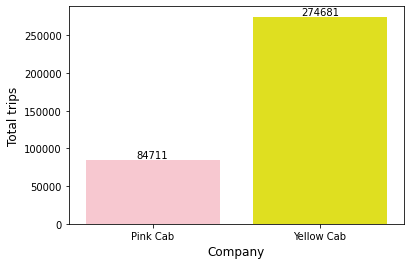

In [20]:
ax = sns.countplot(x="company",palette=['pink', 'yellow'], data=df_master)
ax.set_xlabel("Company", fontsize = 12)
ax.set_ylabel("Total trips", fontsize = 12)
ax.bar_label(ax.containers[0])

In [21]:
count_company = df_master['company'].value_counts()
print(count_company)
p_pink = count_company[1]/(count_company[0]+count_company[1])
p_yellow = count_company[0]/(count_company[0]+count_company[1])
print('Percentage of pink cabs trips', round(p_pink,3), '%')
print('Percentage of yellow cabs trips', round(p_yellow,3), '%')

Yellow Cab    274681
Pink Cab       84711
Name: company, dtype: int64
Percentage of pink cabs trips 0.236 %
Percentage of yellow cabs trips 0.764 %


###### Users by sex and age range

[Text(0, 0, '59782'), Text(0, 0, '85363'), Text(0, 0, '8335')]

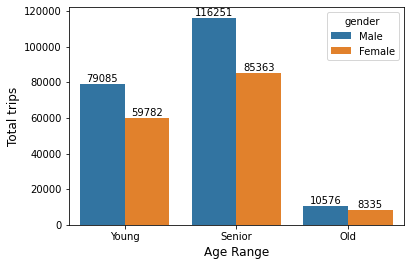

In [22]:
def agecategories(age):
    if age <30:
        return "Young"
    elif age <=60:
        return "Senior"
    else:
        return "Old"

df_master["age_range"] = df_master["age"].apply(agecategories)
ax = sns.countplot(x="age_range",hue ="gender", data=df_master)
ax.set_xlabel("Age Range", fontsize = 12)
ax.set_ylabel("Total trips", fontsize = 12)
ax.bar_label(ax.containers[0] )
ax.bar_label(ax.containers[1] )

###### Average KM profit

In [23]:
df_pink = df_master[df_master["company"] == "Pink Cab"]
df_yellow = df_master[df_master["company"] != "Pink Cab"]
pink_km_profit = df_pink["profit_km"].mean()
yellow_km_profit = df_yellow["profit_km"].mean()
print('Km profit average of pink cabs trips', pink_km_profit)
print('Km profit average of yellow cabs trips', yellow_km_profit)

Km profit average of pink cabs trips 2.769907700396534
Km profit average of yellow cabs trips 7.105507808353114


###### Users by salaries and gender

[Text(0, 0, '117209'), Text(0, 0, '23625'), Text(0, 0, '12646')]

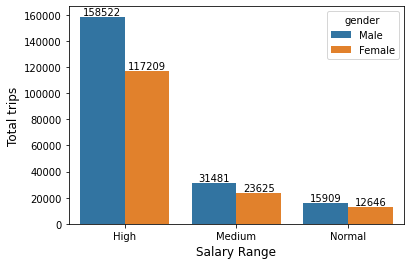

In [24]:
def incomecategories(salary):
    if salary <4000:
        return "Normal"
    elif salary <=8000:
        return "Medium"
    else:
        return "High"

df_master["salary_range"] = df_master["income_(usd/month)"].apply(incomecategories)
ax = sns.countplot(x="salary_range",hue ="gender", data=df_master)
ax.set_xlabel("Salary Range", fontsize = 12)
ax.set_ylabel("Total trips", fontsize = 12)
ax.bar_label(ax.containers[0] )
ax.bar_label(ax.containers[1] )

###### Users by salaries and companies

[Text(0, 0, '210910'), Text(0, 0, '42004'), Text(0, 0, '21767')]

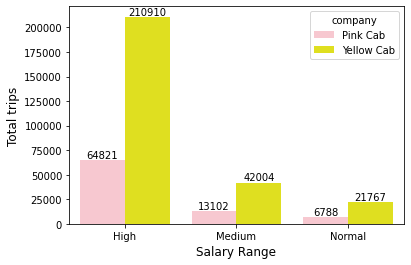

In [25]:
ax1 = sns.countplot(x="salary_range",hue ="company",palette=['pink', 'yellow'], data=df_master)
ax1.set_xlabel("Salary Range", fontsize = 12)
ax1.set_ylabel("Total trips", fontsize = 12)
ax1.bar_label(ax1.containers[0] )
ax1.bar_label(ax1.containers[1] )

##### Correlation between numerical variables

In [26]:
df_master.corr()

,transaction_id,km_travelled,price_charged,cost_of_trip,trip_profit,profit_km,customer_id,age,income_(usd/month)
transaction_id,1.000000,-0.001429,-0.052902,-0.003462,-0.087130,-0.110524,-0.016912,-0.001267,-0.001570
km_travelled,-0.001429,1.000000,0.835753,0.981848,0.462768,-0.000538,0.000389,-0.000369,-0.000544
price_charged,-0.052902,0.835753,1.000000,0.859812,0.864154,0.473222,-0.177324,-0.003084,0.003228
cost_of_trip,-0.003462,0.981848,0.859812,1.000000,0.486056,0.031053,0.003077,-0.000189,-0.000633
trip_profit,-0.087130,0.462768,0.864154,0.486056,1.000000,0.779330,-0.306527,-0.005093,0.006148
profit_km,-0.110524,-0.000538,0.473222,0.031053,0.779330,1.000000,-0.394133,-0.006428,0.008159
customer_id,-0.016912,0.000389,-0.177324,0.003077,-0.306527,-0.394133,1.000000,-0.004735,-0.013608
age,-0.001267,-0.000369,-0.003084,-0.000189,-0.005093,-0.006428,-0.004735,1.000000,0.003907
income_(usd/month),-0.001570,-0.000544,0.003228,-0.000633,0.006148,0.008159,-0.013608,0.003907,1.000000


<AxesSubplot:>

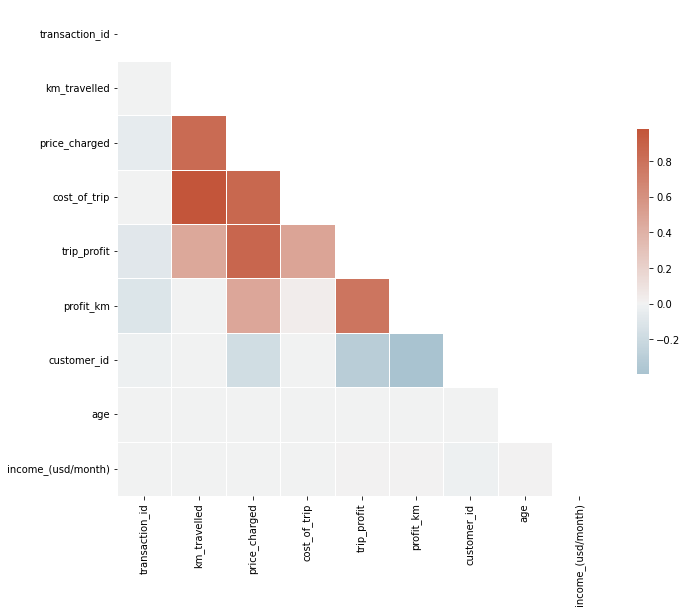

In [28]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_master.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_master.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlation is only observed between the price and cost variables as well as the two columns that have been calculated from them.
